# Setup

In [1]:
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical

import sys
sys.path.append('../')
from exmatchina import *

In [2]:
num_classes = 5

classes = ['Non-ecotic beats (normal beat)', 
           'Supraventricular ectopic beats', 
           'Ventricular ectopic beats', 
           'Fusion beats', 
           'Unknown beats']


class_dict = {
    'Non-ecotic beats (normal beat)': 0,
    'Supraventricular ectopic beats': 1,
    'Ventricular ectopic beats': 2,
    'Fusion beats': 3,
    'Unknown beats': 4
}

inv_class_dict = {v: k for k, v in class_dict.items()}

## These are the randomly generated indices 

all_idx = [86,   228,   692,  1157,  1244]      #Considering just 5 samples

In [3]:
x_train = np.load('data/ecg/X_train.npy')
y_train0 = np.load('data/ecg/y_train.npy')
x_test = np.load('data/ecg/X_test.npy')
y_test0 = np.load('data/ecg/y_test.npy')

y_train = to_categorical(y_train0, num_classes)
y_test = to_categorical(y_test0, num_classes)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(87554, 186, 1)
(87554, 5)
(21892, 186, 1)
(21892, 5)


In [4]:
model = load_model('trained_models/ecg.hdf5')
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs_cnn (InputLayer)      [(None, 186, 1)]          0         
_________________________________________________________________
Conv1 (Conv1D)               (None, 181, 64)           448       
_________________________________________________________________
Bn1 (BatchNormalization)     (None, 181, 64)           256       
_________________________________________________________________
Mp1 (MaxPooling1D)           (None, 91, 64)            0         
_________________________________________________________________
Drop1 (Dropout)              (None, 91, 64)            0         
_________________________________________________________________
Conv2 (Conv1D)               (None, 89, 64)            12352     
_________________________________________________________________
Bn2 (BatchNormalization)     (None, 89, 64)            256 

# ExMatchina

In [5]:
def plot_ecg(test, examples, label):
        # =======GENERATE STUDY EXAMPLES=========
    fig = plt.figure(figsize=(14,5))
    num_display = len(examples) +1
    fig.add_subplot(1, num_display, 1).title.set_text(inv_class_dict[label])
    plt.plot(test)
   # plt.axis('off')
    line = fig.add_subplot(1, 1, 1)
    line.plot([2.39,2.39],[0,1],'--')
    line.set_xlim(0,10)
    line.axis('off')
    for k in range(num_display-1):
        if k >= len(examples):
            continue
        fig.add_subplot(1,num_display,k+2).title.set_text(inv_class_dict[label])
        fig.add_subplot(1,num_display,k+2).title.set_color('#0067FF')
        plt.plot(examples[k])
       # plt.axis('off')
    
    fig.tight_layout()
    plt.tight_layout()
    plt.show()
    # plt.savefig('./image-' + str(i) + '-example.png', bbox_inches='tight')

In [6]:
selected_layer = 'Flatten'

exm = ExMatchina(model=model, layer=selected_layer, examples=x_train)

Getting activations...
Getting labels...
Generating activation matrix...


C:\Users\vikra\.conda\envs\tf2\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
C:\Users\vikra\.conda\envs\tf2\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
C:\Users\vikra\.conda\envs\tf2\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arg

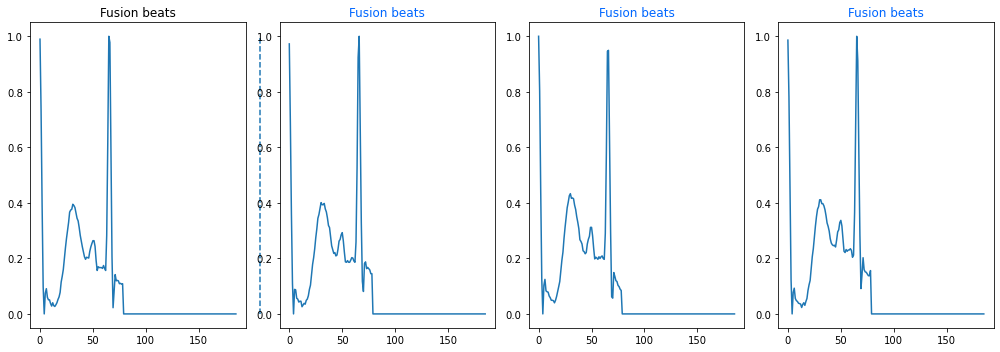

C:\Users\vikra\.conda\envs\tf2\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
C:\Users\vikra\.conda\envs\tf2\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
C:\Users\vikra\.conda\envs\tf2\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arg

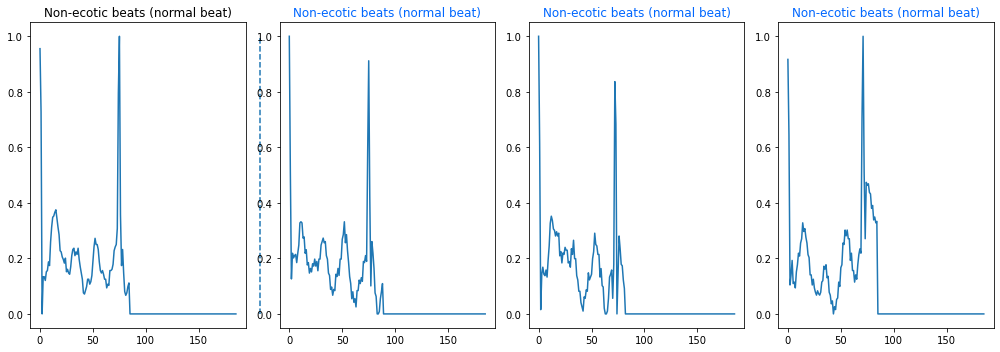

C:\Users\vikra\.conda\envs\tf2\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
C:\Users\vikra\.conda\envs\tf2\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
C:\Users\vikra\.conda\envs\tf2\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arg

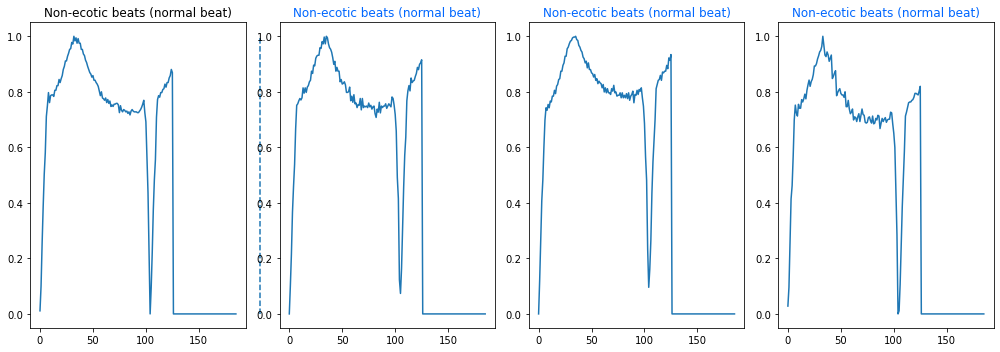

C:\Users\vikra\.conda\envs\tf2\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
C:\Users\vikra\.conda\envs\tf2\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
C:\Users\vikra\.conda\envs\tf2\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arg

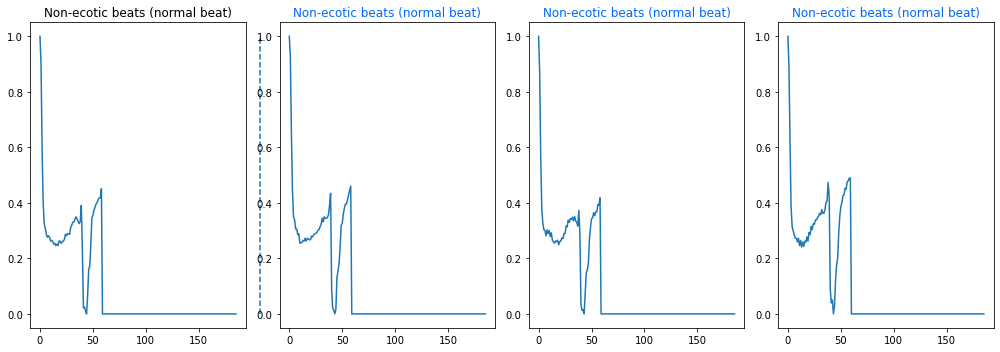

C:\Users\vikra\.conda\envs\tf2\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
C:\Users\vikra\.conda\envs\tf2\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
C:\Users\vikra\.conda\envs\tf2\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arg

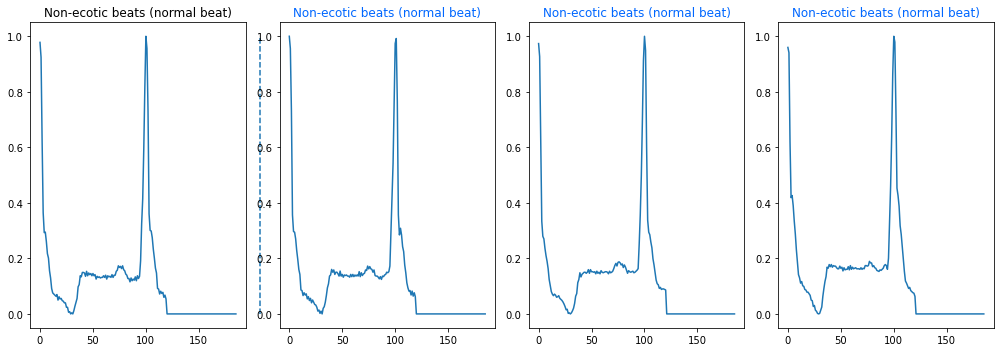

In [7]:
for test_idx in all_idx:
    test_input = x_test[test_idx]
    label = exm.get_label_for(test_input)
    (examples, indices) = exm.return_nearest_examples(test_input, 3)
    plot_ecg(test_input, examples, label)